<a href="https://colab.research.google.com/github/anthonybrown0528/csc-442-course-project/blob/main/notebook/hw6/genre_description_score_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd

In [25]:
filepath = 'https://raw.githubusercontent.com/anthonybrown0528/csc-442-course-project/refs/heads/main/dataset/clean/netflix_film_imdb_data.csv'
df = pd.read_csv(filepath)

In [26]:
df.head()

,title,description_x,release_year,runtime,imdb_id,imdb_score,imdb_votes,show_id,type,director,...,country,date_added,age_certification,num_releases,listed_in,description_y,num_listed_in,first_cast,cast_freq_mean,genre_freq_mean
0,Monty Python and the Holy Grail,"King Arthur, accompanied by his squire, recrui...",1975,91,tt0071853,8.2,530877,s4218,Movie,"Terry Gilliam, Terry Jones",...,United Kingdom,"January 2, 2019",PG,1,"Action & Adventure, Classic Movies, Comedies",The Monty Python comedy clan skewers King Arth...,3,Graham Chapman,10.888889,831.000000
1,My Fair Lady,A snobbish phonetics professor agrees to a wag...,1964,170,tt0058385,7.8,94121,s1127,Movie,George Cukor,...,United States,"April 1, 2021",G,1,"Classic Movies, Music & Musicals",When a Cockney flower girl takes elocution les...,2,Audrey Hepburn,1.083333,203.500000
2,The Blue Lagoon,Two small children and a ship's cook survive a...,1980,104,tt0080453,5.8,69053,s176,Movie,Randal Kleiser,...,United States,"September 1, 2021",R,1,"Dramas, Romantic Movies","Two shipwrecked children, stranded for years o...",2,Brooke Shields,1.375000,1446.500000
3,Bonnie and Clyde,"In the 1930s, bored waitress Bonnie Parker fal...",1967,110,tt0061418,7.7,111189,s6359,Movie,Arthur Penn,...,United States,"January 1, 2021",R,1,"Action & Adventure, Classic Movies, Dramas","Bonnie Parker and Clyde Barrow are young, in l...",3,Warren Beatty,1.777778,1076.333333
4,The Guns of Navarone,A team of allied saboteurs are assigned an imp...,1961,158,tt0054953,7.5,50150,s178,Movie,J. Lee Thompson,...,"United Kingdom, United States","September 1, 2021",TV-14,1,"Action & Adventure, Classic Movies","During World War II, British forces launch an ...",2,Gregory Peck,1.300000,459.500000


In [39]:
column_subset = ['title', 'release_year', 'listed_in', 'description_x', 'imdb_score']
query_df = df[column_subset]

query_df

,title,release_year,listed_in,description_x,imdb_score
0,Monty Python and the Holy Grail,1975,"Action & Adventure, Classic Movies, Comedies","King Arthur, accompanied by his squire, recrui...",8.2
1,My Fair Lady,1964,"Classic Movies, Music & Musicals",A snobbish phonetics professor agrees to a wag...,7.8
2,The Blue Lagoon,1980,"Dramas, Romantic Movies",Two small children and a ship's cook survive a...,5.8
3,Bonnie and Clyde,1967,"Action & Adventure, Classic Movies, Dramas","In the 1930s, bored waitress Bonnie Parker fal...",7.7
4,The Guns of Navarone,1961,"Action & Adventure, Classic Movies",A team of allied saboteurs are assigned an imp...,7.5
...,...,...,...,...,...
2472,Myriam Fares: The Journey,2021,"Documentaries, International Movies, Music & M...","From pregnancy to album preparations, Lebanese...",2.3
2473,The Tambour of Retribution,2021,"Dramas, International Movies, Romantic Movies",The son of the swordsman falls in love with th...,6.9
2474,Pitta Kathalu,2021,"International TV Shows, TV Dramas","Four different women, four journeys of love an...",5.1
2475,Loyiso Gola: Unlearning,2021,Stand-Up Comedy,South African comedian Loyiso Gola serves up f...,5.9


In [28]:
features = ['title', 'release_year', 'listed_in', 'description_x']

feature_df = query_df[features]
target_df = query_df['imdb_score']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_df, test_size=0.3, random_state=42)

In [31]:
movie_genre_map = {
    'title': [],
    'release_year': [],
    'genre': []
}

for _, row in X_train.iterrows():
  genres = row['listed_in'].split(',')

  for genre in genres:
    movie_genre_map['title'].append(row['title'])
    movie_genre_map['release_year'].append(row['release_year'])
    movie_genre_map['genre'].append(genre)

In [38]:
movie_genre_df = pd.DataFrame(movie_genre_map)
movie_genre_df

,title,release_year,genre
0,Bogda,2018,Dramas
1,Bogda,2018,International Movies
2,Frequency,2016,Crime TV Shows
3,Frequency,2016,TV Dramas
4,Frequency,2016,TV Mysteries
...,...,...,...
3934,Nappily Ever After,2018,Romantic Movies
3935,Cities of Last Things,2018,Dramas
3936,Cities of Last Things,2018,Independent Movies
3937,Cities of Last Things,2018,International Movies


In [65]:
genre_group = movie_genre_df.groupby(by='genre')

In [66]:
genre_counts_df = genre_group.count()
genre_counts_df

,title,release_year
genre,,
Anime Features,4,4
Children & Family Movies,6,6
Classic Movies,4,4
Comedies,100,100
Crime TV Shows,9,9
...,...,...
TV Comedies,23,23
TV Dramas,17,17
TV Horror,1,1


<Axes: title={'center': 'Genre Counts'}, ylabel='genre'>

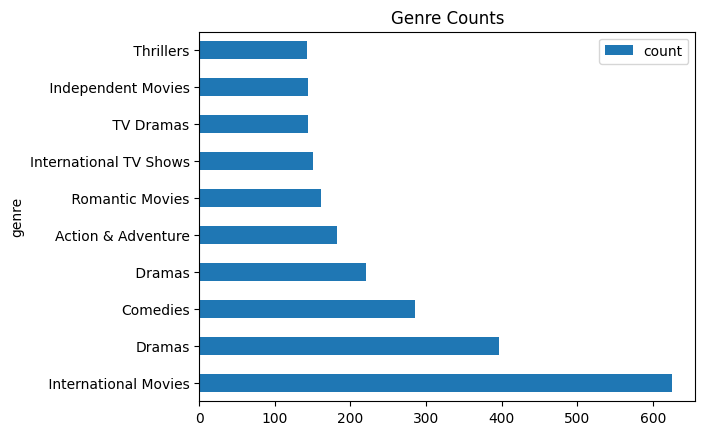

In [72]:
genre_counts_sorted_df = genre_counts_df.sort_values(by='title', ascending=False)
most_frequent_genres_df = genre_counts_sorted_df.iloc[:10]

frequent_genres = list(most_frequent_genres_df.index)

most_frequent_genres_df = most_frequent_genres_df.drop(columns=['release_year']).rename(columns={'title': 'count'})
most_frequent_genres_df.plot.barh(y='count', title='Genre Counts')

In [33]:
import nltk
from nltk.tokenize import word_tokenize


nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [34]:
movie_description_words_map = {
    'title': [],
    'release_year': [],
    'description_word': []
}

for _, row in X_train.iterrows():
  description = row['description_x']
  tokens = word_tokenize(description)

  for token in tokens:
    movie_description_words_map['title'].append(row['title'])
    movie_description_words_map['release_year'].append(row['release_year'])
    movie_description_words_map['description_word'].append(token)

In [37]:
movie_description_words_df = pd.DataFrame(movie_description_words_map)
movie_description_words_df

,title,release_year,description_word
0,Bogda,2018,A
1,Bogda,2018,dysfunctional
2,Bogda,2018,mother-daughter
3,Bogda,2018,take
4,Bogda,2018,a
...,...,...,...
75458,The Book of Henry,2017,into
75459,The Book of Henry,2017,her
75460,The Book of Henry,2017,own
75461,The Book of Henry,2017,hands


In [41]:
movie_genre_description_word_df = pd.merge(movie_genre_df, movie_description_words_df, how='inner', on=['title', 'release_year'])
movie_genre_description_word_df = movie_genre_description_word_df[['genre', 'description_word']]

movie_genre_description_word_df

,genre,description_word
0,Dramas,A
1,Dramas,dysfunctional
2,Dramas,mother-daughter
3,Dramas,take
4,Dramas,a
...,...,...
176082,Dramas,into
176083,Dramas,her
176084,Dramas,own
176085,Dramas,hands


In [77]:
genre_word_query_df = movie_genre_description_word_df
genre_word_query_df['count'] = 0

genre_word_query_group = genre_word_query_df.groupby(by=['genre', 'description_word'])

In [79]:
genre_word_query_count_df = genre_word_query_group.count()
genre_word_query_count_df.loc[frequent_genres, :]

count
genre                description_word       
International Movies !                     6
                     &                     2
                     '                    28
                     ''                   27
                     'Echolocation         1
...                                      ...
Thrillers            â€˜invisible          1
                     â€‹â€‹Spain           1
                     â€™                   1
                     “                     1
                     ”                     3

[31392 rows x 1 columns]

In [42]:
genre_bag_of_description_words_map = {}

for _, row in movie_genre_description_word_df.iterrows():
  genre = row['genre']
  if genre not in genre_bag_of_description_words_map:
    genre_bag_of_description_words_map[genre] = ''

  genre_bag_of_description_words_map[genre] = genre_bag_of_description_words_map[genre] + ' ' + row['description_word']

In [45]:
genre_bag_of_description_words_df = pd.DataFrame({
    'genre': genre_bag_of_description_words_map.keys(),
    'bow': genre_bag_of_description_words_map.values()
})
genre_bag_of_description_words_df

,genre,bow
0,Dramas,A dysfunctional mother-daughter take a road t...
1,International Movies,A dysfunctional mother-daughter take a road t...
2,Crime TV Shows,Detective Raimy Sullivan is stunned when a vo...
3,TV Dramas,Detective Raimy Sullivan is stunned when a vo...
4,TV Mysteries,Detective Raimy Sullivan is stunned when a vo...
...,...,...
62,Anime Features,"In an small fishing village , a gloomy middle..."
63,Stand-Up Comedy & Talk Shows,Offbeat comic James Acaster covers the strang...
64,TV Horror,"In the year 2093 , a team of scientists aboar..."
65,Classic Movies,"In the 1930s , bored waitress Bonnie Parker f..."


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
vectorizer = CountVectorizer(stop_words='english')

In [94]:
word_genre_matrix = vectorizer.fit_transform(genre_bag_of_description_words_df['bow'])
word_genre_matrix

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 50515 stored elements and shape (67, 10818)>

In [95]:
word_genre_matrix_df = pd.DataFrame(word_genre_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=genre_bag_of_description_words_df['genre'])
word_genre_matrix_df = word_genre_matrix_df.T

word_genre_matrix_df

genre,Dramas,International Movies,Crime TV Shows,TV Dramas,TV Mysteries,Music & Musicals,International Movies,Thrillers,International TV Shows,Teen TV Shows,...,Romantic TV Shows,Faith & Spirituality,Documentaries,Cult Movies,Romantic Movies,Anime Features,Stand-Up Comedy & Talk Shows,TV Horror,Classic Movies,Sci-Fi & Fantasy
00,0,0,0,1,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
000,2,0,0,0,2,0,0,1,3,0,...,0,0,0,0,0,0,0,0,1,0
007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2,4,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
100,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
œthe,0,2,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
œvideo,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
œwe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
œwhat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
import matplotlib.pyplot as plt

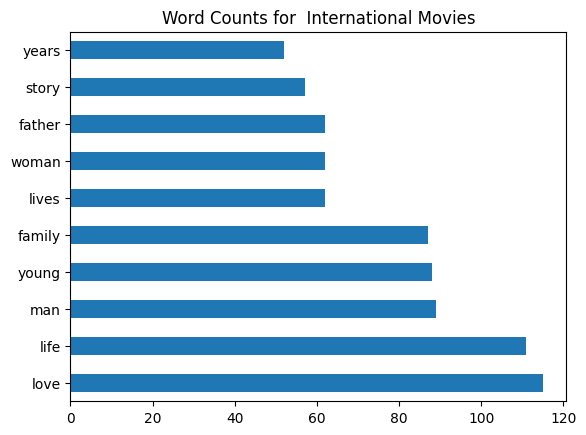

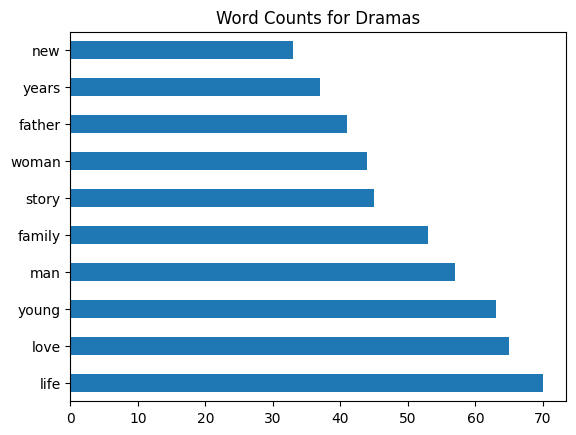

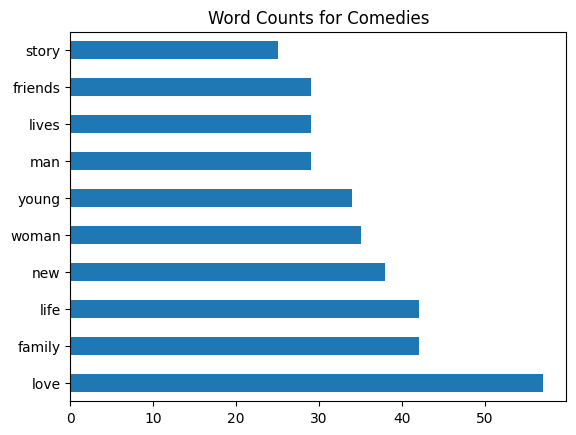

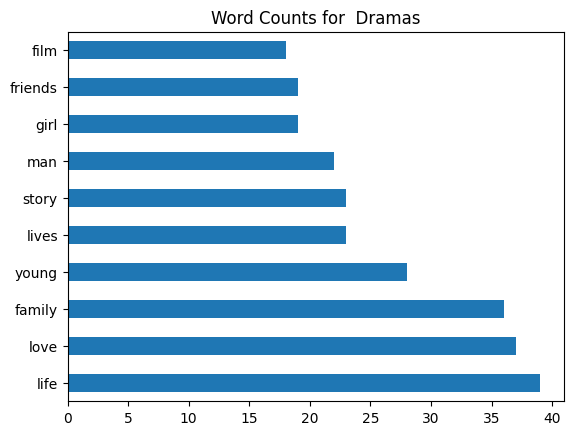

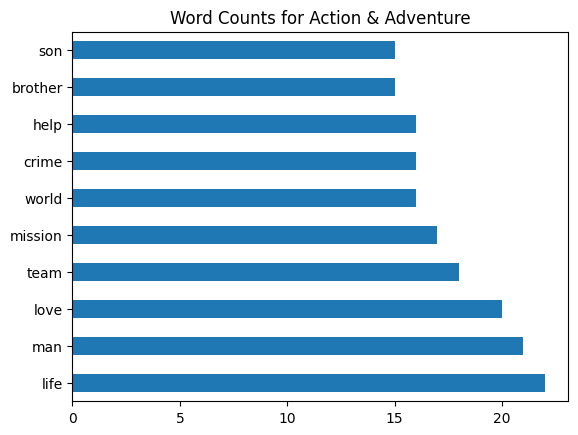

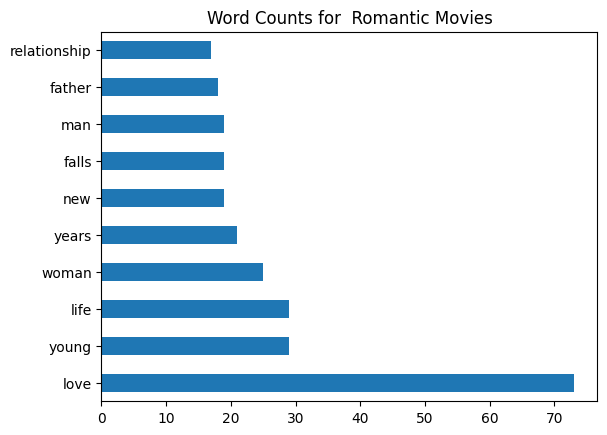

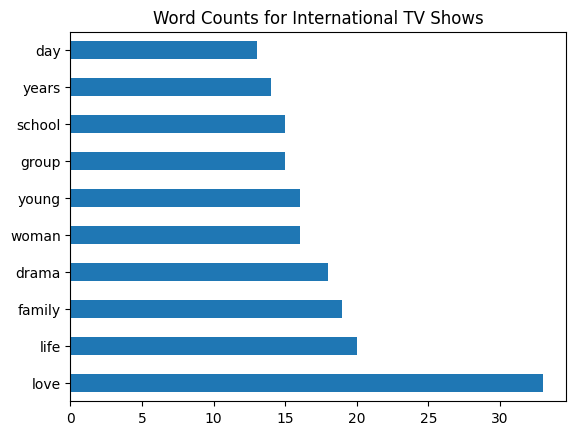

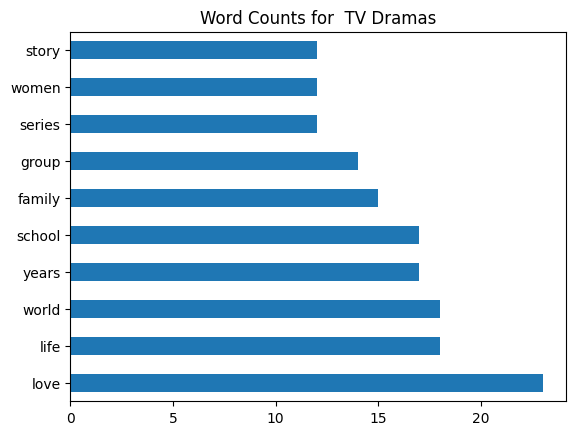

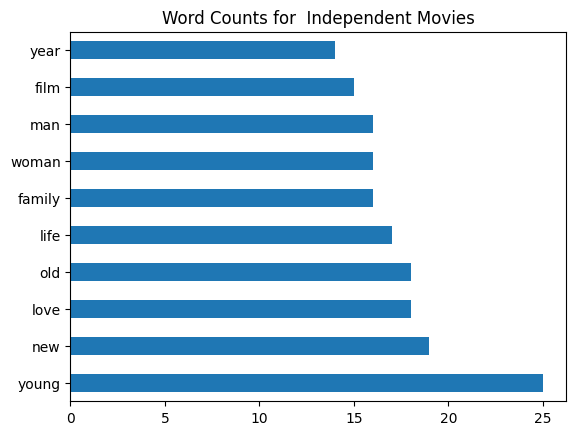

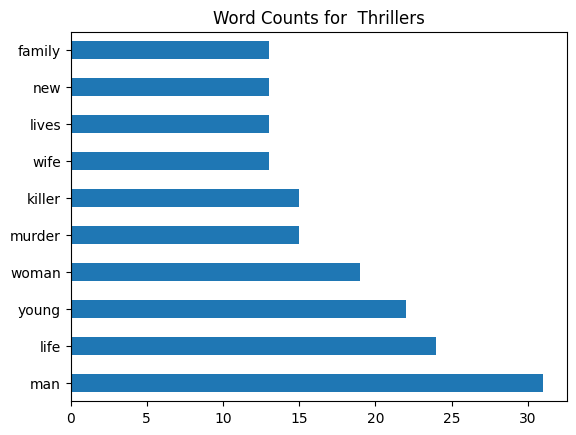

In [97]:
for genre in frequent_genres:
  genre_series = word_genre_matrix_df[genre]
  genre_series.sort_values(ascending=False).iloc[:10].plot.barh(title=f'Word Counts for {genre}')

  plt.show()

In [98]:
word_genre_matrix.shape

(67, 10818)

In [99]:
from sklearn.naive_bayes import MultinomialNB

In [100]:
model_clf = MultinomialNB()
model_clf.fit(word_genre_matrix, genre_bag_of_description_words_df['genre'].values)

MultinomialNB()

In [101]:
movie_word_matrix = vectorizer.transform(X_train['description_x'])
movie_genre_weights = model_clf.predict_proba(movie_word_matrix)

movie_genre_weights.shape

(1733, 67)

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
model_rgn = LinearRegression()
model_rgn.fit(X=movie_genre_weights, y=y_train)

LinearRegression()

In [104]:
model_rgn.score(X=movie_genre_weights, y=y_train)

0.20613530338951858